# SVM 

In [49]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [50]:
X,Y = make_classification(n_classes=2, n_samples=400, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=3)
Y[Y==0] = -1 

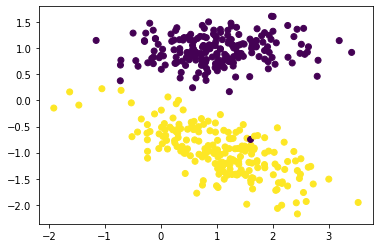

In [51]:
plt.scatter(X[:,0], X[:,1],c=Y)
plt.show()

In [52]:
class SVM :
    
    def __init__(self, c = 1000.0) :
        
        self.c = c 
        self.W = 0 
        self.b = 0
        
    def calculate_loss(self, W, b, X, Y) :
        
        loss = 0.0       
        loss += 0.5 * np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m) :
            
            ti = Y[i] * (np.dot(W,X[i].T)+b)
            loss += self.c * max(0,1-ti)
            
        return loss[0][0]
    

    def fit(self, X, Y, batch_size=100, lr = 0.001, max_itr = 300) :
        
        m = X.shape[0] 
        n = X.shape[1]
        
        c = self.c 
        
        # initialize w and bias with 0's
        w = np.zeros((1, n))     
        bias = 0 
        
        # make a list to store all the values of loss
        loss_list = []
        
        for i in range(max_itr) :
            
            l =  self.calculate_loss(w, bias, X, Y)
            loss_list.append(l)
            
            ids = np.arange(m)
            np.random.shuffle(ids)
            
            
            for batch_start in range(0,m,batch_size) :
                gradw = 0
                gradb = 0
                
                for j in range(batch_start, batch_start+batch_size) :
                    
                    if j < m :
                        
                        i = ids[j] 
                        
                        ti = Y[i] * (np.dot(w,X[i].T) + bias)
                        
                        if ti >= 1 :
                            gradw += 0
                            gradb += 0
                        else :
                            gradw += c * Y[i] * X[i]
                            gradb += c * Y[i]
                            
                            
                w = w - lr * w + lr * gradw
                bias = bias + lr * gradb
                
        
        
        self.W = w  
        self.b = bias 
        
        return w, bias, loss_list

In [53]:
mysvm = SVM()
w, bias, loss_list = mysvm.fit(X,Y)

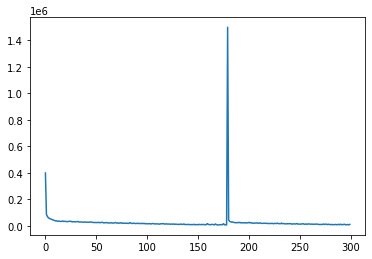

In [54]:
plt.plot(loss_list)
plt.show()

In [55]:
def plotHyperplane(w1, w2, b) :
    
    plt.figure(figsize=(12,12))
    x1 = np.linspace(-2,4,10) 
    x2 = -(w1*x1 + b) / w2
    xp = -(w1*x1 + b + 1) / w2
    xn = -(w1*x1 + b - 1) / w2
    
    plt.plot(x1,x2, label = "Separating Hyperplane")
    plt.plot(x1,xp, label = "Positive Hyperplane")
    plt.plot(x1,xn, label = "Negative Hyperplane")
    
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.show()

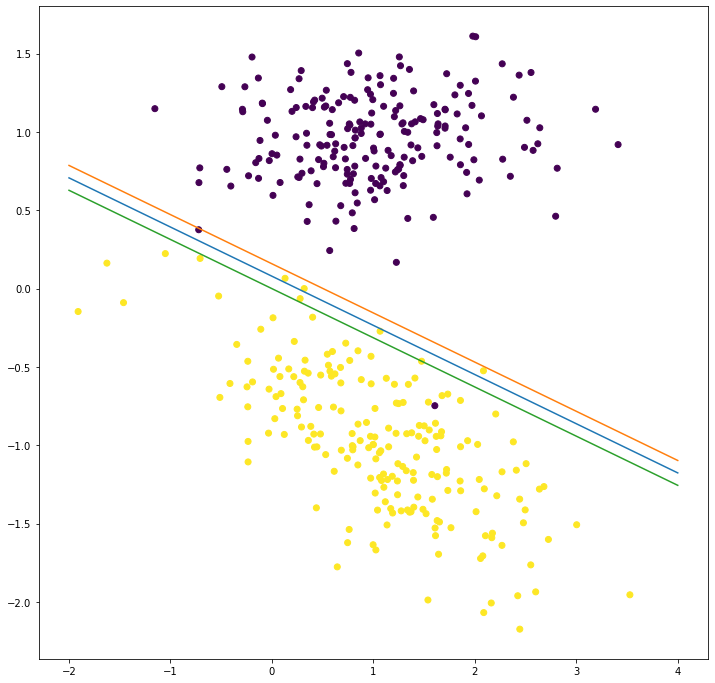

In [56]:
plotHyperplane(w[0,0],w[0,1],bias)